In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Database
from sqlalchemy import create_engine

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries loaded successfully")

Libraries loaded successfully


# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Database
from sqlalchemy import create_engine

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries loaded successfully")

In [3]:
# Load data from database
db_path = '../data/processed/company_data.db'
engine = create_engine(f'sqlite:///{db_path}')

# Load all tables
df_financials = pd.read_sql('financials', engine)
df_companies = pd.read_sql('companies', engine)
df_cpi = pd.read_sql('cpi', engine)
df_bond_yields = pd.read_sql('uk_bond_yields', engine)
df_oil = pd.read_sql('oil_prices', engine)

# Convert date columns
df_financials['date'] = pd.to_datetime(df_financials['date'])
df_bond_yields['date'] = pd.to_datetime(df_bond_yields['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])

print("Data loaded successfully\n")
print(f"Financial records: {len(df_financials)}")
print(f"Companies: {len(df_companies)}")
print(f"Date range: {df_financials['date'].min().date()} to {df_financials['date'].max().date()}")

print("\nSector distribution:")
print(df_companies['Sector'].value_counts())

print("\nFinancial data completeness:")
key_metrics = ['total_debt', 'revenue', 'net_income', 'debt_to_equity', 'operating_margin']
for metric in key_metrics:
    pct_complete = (1 - df_financials[metric].isna().sum() / len(df_financials)) * 100
    print(f"{metric:20s}: {pct_complete:5.1f}%")

Data loaded successfully

Financial records: 73
Companies: 15
Date range: 2020-11-30 to 2025-03-31

Sector distribution:
Sector
Consumer Goods        5
Industrials           2
Energy                2
Healthcare            2
Financials            2
Technology            1
Telecommunications    1
Name: count, dtype: int64

Financial data completeness:
total_debt          :  82.2%
revenue             :  82.2%
net_income          :  82.2%
debt_to_equity      :  82.2%
operating_margin    :  76.7%


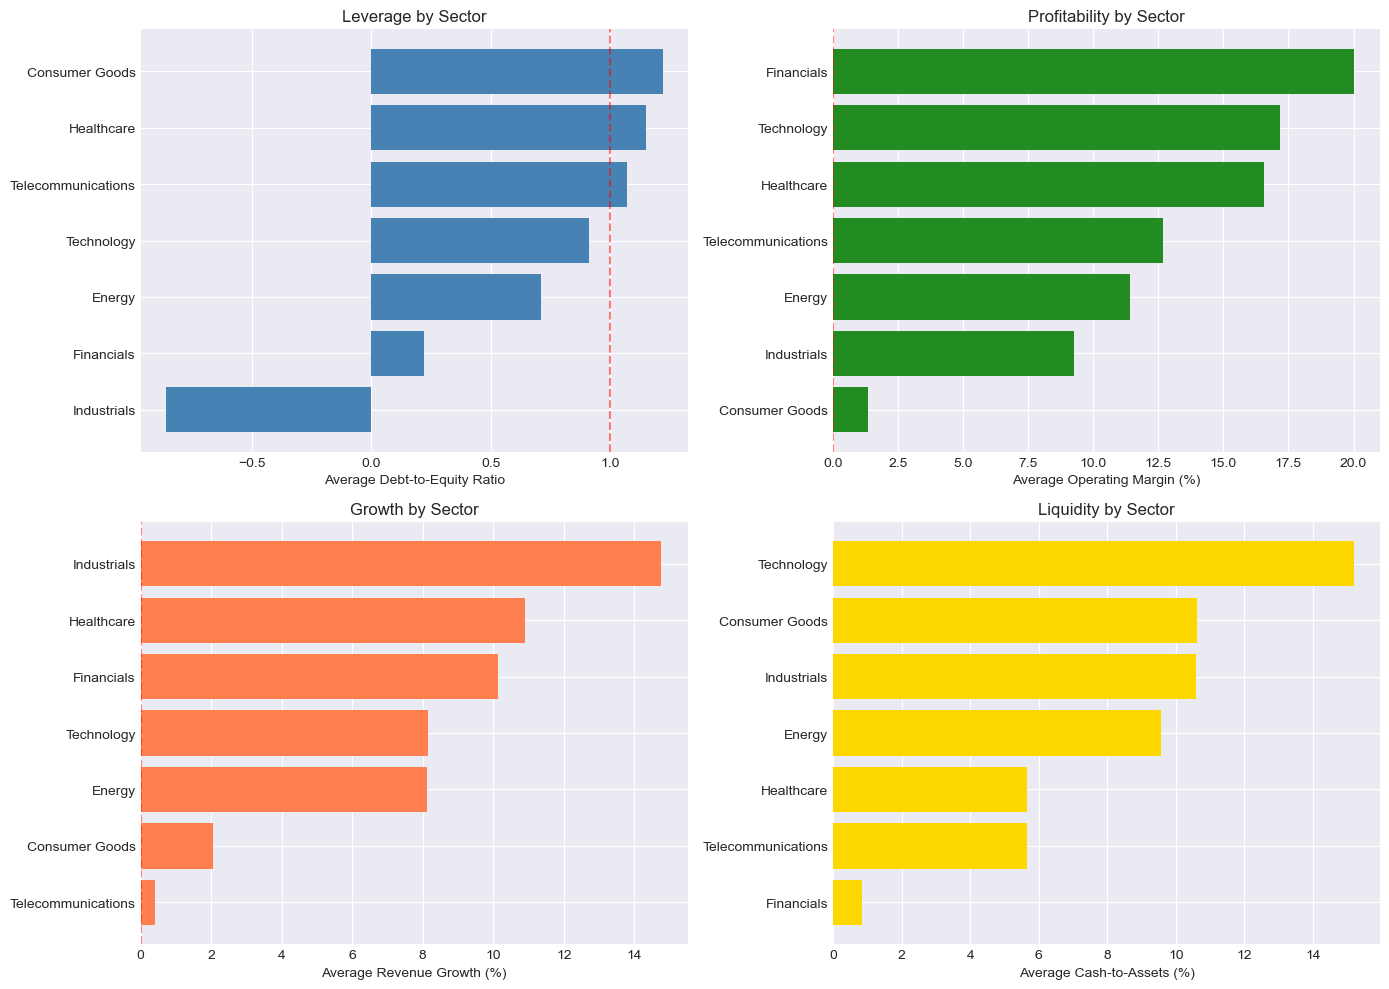

Sector insights:
Highest leverage: Consumer Goods (1.22x)
Most profitable: Financials (20.0%)
Fastest growth: Industrials (14.8%)


In [4]:
# Sector-level financial health comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Average debt-to-equity by sector
sector_debt = df_financials.groupby('sector')['debt_to_equity'].mean().sort_values()
axes[0, 0].barh(sector_debt.index, sector_debt.values, color='steelblue')
axes[0, 0].set_xlabel('Average Debt-to-Equity Ratio')
axes[0, 0].set_title('Leverage by Sector')
axes[0, 0].axvline(1.0, color='red', linestyle='--', alpha=0.5, label='High leverage threshold')

# Average operating margin by sector
sector_margin = df_financials.groupby('sector')['operating_margin'].mean().sort_values()
axes[0, 1].barh(sector_margin.index, sector_margin.values * 100, color='forestgreen')
axes[0, 1].set_xlabel('Average Operating Margin (%)')
axes[0, 1].set_title('Profitability by Sector')
axes[0, 1].axvline(0, color='red', linestyle='--', alpha=0.5)

# Revenue growth by sector
sector_growth = df_financials.groupby('sector')['revenue_growth'].mean().sort_values()
axes[1, 0].barh(sector_growth.index, sector_growth.values * 100, color='coral')
axes[1, 0].set_xlabel('Average Revenue Growth (%)')
axes[1, 0].set_title('Growth by Sector')
axes[1, 0].axvline(0, color='red', linestyle='--', alpha=0.5)

# Cash position by sector (% of assets)
sector_cash = df_financials.groupby('sector')['cash_to_assets'].mean().sort_values()
axes[1, 1].barh(sector_cash.index, sector_cash.values * 100, color='gold')
axes[1, 1].set_xlabel('Average Cash-to-Assets (%)')
axes[1, 1].set_title('Liquidity by Sector')

plt.tight_layout()
plt.savefig('../data/outputs/sector_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Sector insights:")
print(f"Highest leverage: {sector_debt.idxmax()} ({sector_debt.max():.2f}x)")
print(f"Most profitable: {sector_margin.idxmax()} ({sector_margin.max()*100:.1f}%)")
print(f"Fastest growth: {sector_growth.idxmax()} ({sector_growth.max()*100:.1f}%)")

In [6]:
# Check Industrials companies specifically
industrials = df_financials[df_financials['sector'] == 'Industrials'].copy()

print("Industrials sector breakdown:\n")
for company in industrials['company'].unique():
    company_data = industrials[industrials['company'] == company]
    print(f"\n{company}:")
    print(company_data[['date', 'debt_to_equity', 'stockholders_equity', 'total_debt']].to_string(index=False))

print("\n" + "="*50)
print("\nDebt-to-equity distribution (all companies):")
print(df_financials['debt_to_equity'].describe())



Industrials sector breakdown:


BAE Systems:
      date  debt_to_equity  stockholders_equity   total_debt
2020-12-31             NaN                  NaN          NaN
2021-12-31        0.854761         7.436000e+09 6.356000e+09
2022-12-31        0.606777         1.121500e+10 6.805000e+09
2023-12-31        0.613600         1.055900e+10 6.479000e+09
2024-12-31        0.874053         1.161600e+10 1.015300e+10

Rolls-Royce:
      date  debt_to_equity  stockholders_equity   total_debt
2020-12-31             NaN                  NaN          NaN
2021-12-31       -1.667954        -4.662000e+09 7776000000.0
2022-12-31       -0.984298        -6.050000e+09 5955000000.0
2023-12-31       -1.564521        -3.681000e+09 5759000000.0
2024-12-31       -5.630482        -9.120000e+08 5135000000.0


Debt-to-equity distribution (all companies):
count    60.000000
mean      0.701552
std       1.068291
min      -5.630482
25%       0.498519
50%       0.911114
75%       1.213786
max       2.085446
Name: debt

In [7]:
# Check for negative equity across all companies
negative_equity = df_financials[df_financials['stockholders_equity'] < 0]
print(f"\nCompanies with negative equity: {len(negative_equity)}")
if len(negative_equity) > 0:
    print(negative_equity[['company', 'date', 'stockholders_equity', 'total_debt']])


Companies with negative equity: 4
        company       date  stockholders_equity    total_debt
44  Rolls-Royce 2021-12-31        -4.662000e+09  7.776000e+09
45  Rolls-Royce 2022-12-31        -6.050000e+09  5.955000e+09
46  Rolls-Royce 2023-12-31        -3.681000e+09  5.759000e+09
47  Rolls-Royce 2024-12-31        -9.120000e+08  5.135000e+09


In [8]:
# Create a distress flag and clean metrics
df_financials['negative_equity'] = df_financials['stockholders_equity'] < 0
df_financials['in_distress'] = (
    (df_financials['stockholders_equity'] < 0) | 
    (df_financials['debt_to_equity'] > 3)
)

print("Distress identification:")
print(f"Records with negative equity: {df_financials['negative_equity'].sum()}")
print(f"Records flagged as distress: {df_financials['in_distress'].sum()}")

print("\nDistressed companies:")
distressed = df_financials[df_financials['in_distress']][['company', 'date', 'stockholders_equity', 'debt_to_equity']]
print(distressed.to_string(index=False))

# Create cleaned version for sector comparison (exclude distressed records)
df_healthy = df_financials[~df_financials['in_distress']].copy()

print(f"\n{'='*50}")
print(f"Healthy companies for analysis: {len(df_healthy)} records")
print(f"Excluded distressed records: {len(df_financials) - len(df_healthy)}")

Distress identification:
Records with negative equity: 4
Records flagged as distress: 4

Distressed companies:
    company       date  stockholders_equity  debt_to_equity
Rolls-Royce 2021-12-31        -4.662000e+09       -1.667954
Rolls-Royce 2022-12-31        -6.050000e+09       -0.984298
Rolls-Royce 2023-12-31        -3.681000e+09       -1.564521
Rolls-Royce 2024-12-31        -9.120000e+08       -5.630482

Healthy companies for analysis: 69 records
Excluded distressed records: 4


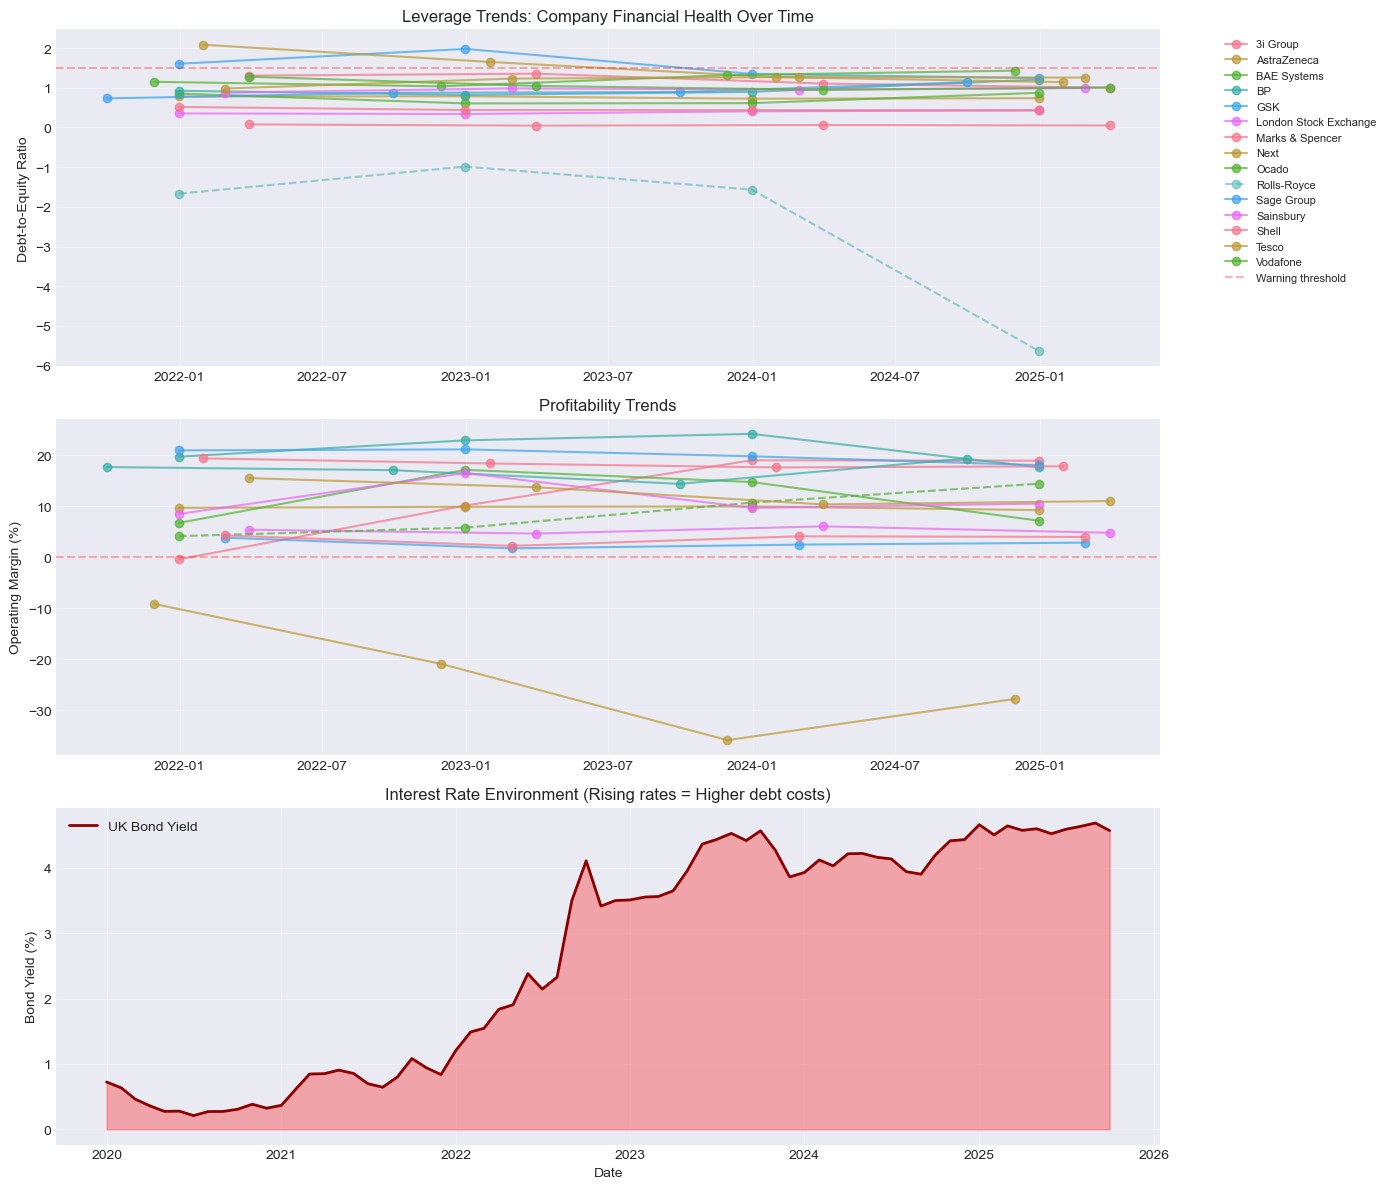

In [9]:
# Time series: Company health vs economic conditions
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Filter to companies with sufficient data
major_companies = df_financials.groupby('company').size()
major_companies = major_companies[major_companies >= 3].index

# Plot 1: Debt-to-equity over time by company
for company in major_companies:
    company_data = df_financials[df_financials['company'] == company].sort_values('date')
    
    # Skip if all NaN
    if company_data['debt_to_equity'].notna().any():
        # Mark distressed periods
        style = '--' if company == 'Rolls-Royce' else '-'
        alpha = 0.5 if company == 'Rolls-Royce' else 0.7
        
        axes[0].plot(company_data['date'], company_data['debt_to_equity'], 
                    marker='o', label=company, linestyle=style, alpha=alpha)

axes[0].axhline(y=1.5, color='red', linestyle='--', alpha=0.3, label='Warning threshold')
axes[0].set_ylabel('Debt-to-Equity Ratio')
axes[0].set_title('Leverage Trends: Company Financial Health Over Time')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(True, alpha=0.3)

# Plot 2: Operating margin trends
for company in major_companies:
    company_data = df_financials[df_financials['company'] == company].sort_values('date')
    
    if company_data['operating_margin'].notna().any():
        style = '--' if company == 'Rolls-Royce' else '-'
        axes[1].plot(company_data['date'], company_data['operating_margin'] * 100,
                    marker='o', label=company, linestyle=style, alpha=0.7)

axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.3)
axes[1].set_ylabel('Operating Margin (%)')
axes[1].set_title('Profitability Trends')
axes[1].grid(True, alpha=0.3)

# Plot 3: UK bond yields (economic pressure)
bond_recent = df_bond_yields[df_bond_yields['date'] >= '2020-01-01']
axes[2].plot(bond_recent['date'], bond_recent['uk_bond_yield'], 
            color='darkred', linewidth=2, label='UK Bond Yield')
axes[2].fill_between(bond_recent['date'], bond_recent['uk_bond_yield'], 
                     alpha=0.3, color='red')
axes[2].set_ylabel('Bond Yield (%)')
axes[2].set_xlabel('Date')
axes[2].set_title('Interest Rate Environment (Rising rates = Higher debt costs)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/outputs/temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Correlation between financial metrics and economic indicators
# First, merge financial data with monthly economic data

# Convert CPI period to datetime (approximate - use first day of month)
df_cpi['date'] = pd.to_datetime(df_cpi['period'].str.replace(' ', '-') + '-01', errors='coerce')
df_cpi_monthly = df_cpi[['date', 'value']].rename(columns={'value': 'cpi'})

# Merge financials with nearest economic indicators
df_merged = df_financials.copy()

# Merge with bond yields (monthly)
df_merged = pd.merge_asof(
    df_merged.sort_values('date'),
    df_bond_yields[['date', 'uk_bond_yield']].sort_values('date'),
    on='date',
    direction='nearest'
)

# Merge with CPI
df_merged = pd.merge_asof(
    df_merged.sort_values('date'),
    df_cpi_monthly.sort_values('date'),
    on='date',
    direction='nearest'
)

print(f"Merged dataset: {len(df_merged)} records")
print(f"Records with economic data: {df_merged['uk_bond_yield'].notna().sum()}")

# Calculate correlations (exclude distressed records for cleaner signal)
df_healthy_merged = df_merged[~df_merged['in_distress']].copy()

correlation_metrics = [
    'debt_to_equity', 'operating_margin', 'net_margin', 
    'revenue_growth', 'cash_to_assets', 
    'uk_bond_yield', 'cpi'
]

corr_matrix = df_healthy_merged[correlation_metrics].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation: Financial Health vs Economic Conditions\n(Excluding Distressed Companies)', 
          fontsize=12, pad=20)
plt.tight_layout()
plt.savefig('../data/outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey correlations with bond yields:")
print(corr_matrix['uk_bond_yield'].sort_values(ascending=False))

ValueError: Merge keys contain null values on right side

In [11]:
# Clean CPI data more carefully
df_cpi_clean = df_cpi.copy()

# Remove any rows where period conversion will fail
df_cpi_clean = df_cpi_clean[df_cpi_clean['period'].notna()].copy()

# Parse dates properly
def parse_cpi_date(period_str):
    """Convert CPI period strings like '2025 JAN' to datetime"""
    try:
        parts = period_str.strip().split()
        if len(parts) == 2:
            year, month = parts
            month_map = {
                'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04',
                'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08',
                'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'
            }
            if month in month_map:
                return pd.to_datetime(f"{year}-{month_map[month]}-01")
    except:
        pass
    return None

df_cpi_clean['date'] = df_cpi_clean['period'].apply(parse_cpi_date)
df_cpi_clean = df_cpi_clean[df_cpi_clean['date'].notna()].copy()
df_cpi_monthly = df_cpi_clean[['date', 'value']].rename(columns={'value': 'cpi'})

print(f"CPI records with valid dates: {len(df_cpi_monthly)}")
print(f"Date range: {df_cpi_monthly['date'].min()} to {df_cpi_monthly['date'].max()}")

# Now proceed with merge
df_merged = df_financials.copy()

df_merged = pd.merge_asof(
    df_merged.sort_values('date'),
    df_bond_yields[['date', 'uk_bond_yield']].sort_values('date'),
    on='date',
    direction='nearest'
)

df_merged = pd.merge_asof(
    df_merged.sort_values('date'),
    df_cpi_monthly.sort_values('date'),
    on='date',
    direction='nearest'
)

print(f"\nMerged dataset: {len(df_merged)} records")
print(f"With bond yields: {df_merged['uk_bond_yield'].notna().sum()}")
print(f"With CPI: {df_merged['cpi'].notna().sum()}")

CPI records with valid dates: 190
Date range: 2010-01-01 00:00:00 to 2025-10-01 00:00:00

Merged dataset: 73 records
With bond yields: 73
With CPI: 73


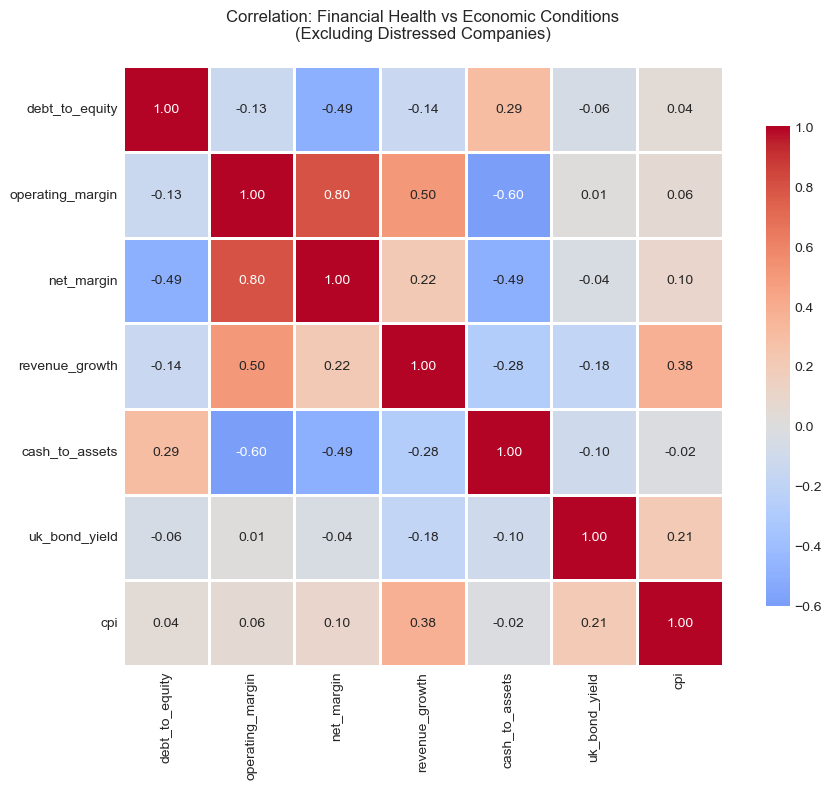


Key correlations with economic indicators:

Bond yields (interest rates):
revenue_growth     -0.183975
cash_to_assets     -0.104300
debt_to_equity     -0.057840
net_margin         -0.039711
operating_margin    0.009813
cpi                 0.210593
Name: uk_bond_yield, dtype: float64

Inflation (CPI):
cash_to_assets     -0.023385
debt_to_equity      0.043703
operating_margin    0.056933
net_margin          0.097650
uk_bond_yield       0.210593
revenue_growth      0.377554
Name: cpi, dtype: float64


Insights:
Strongest bond yield correlation: revenue_growth (-0.184)


In [12]:
# Calculate correlations (exclude distressed records)
df_healthy_merged = df_merged[~df_merged['in_distress']].copy()

correlation_metrics = [
    'debt_to_equity', 'operating_margin', 'net_margin', 
    'revenue_growth', 'cash_to_assets', 
    'uk_bond_yield', 'cpi'
]

corr_matrix = df_healthy_merged[correlation_metrics].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation: Financial Health vs Economic Conditions\n(Excluding Distressed Companies)', 
          fontsize=12, pad=20)
plt.tight_layout()
plt.savefig('../data/outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey correlations with economic indicators:")
print("\nBond yields (interest rates):")
print(corr_matrix['uk_bond_yield'].drop('uk_bond_yield').sort_values())
print("\nInflation (CPI):")
print(corr_matrix['cpi'].drop('cpi').sort_values())

print("\n" + "="*50)
print("\nInsights:")
strongest_bond = corr_matrix['uk_bond_yield'].drop(['uk_bond_yield', 'cpi']).abs().idxmax()
print(f"Strongest bond yield correlation: {strongest_bond} ({corr_matrix.loc[strongest_bond, 'uk_bond_yield']:.3f})")

In [13]:
# Dig deeper - look at specific distress case
print("Rolls-Royce case study: Distress period analysis\n")

rr_data = df_merged[df_merged['company'] == 'Rolls-Royce'].sort_values('date')
rr_data_display = rr_data[['date', 'debt_to_equity', 'operating_margin', 'uk_bond_yield', 'cpi', 'in_distress']]

print(rr_data_display.to_string(index=False))

print("\n" + "="*50)
print("\nPattern analysis:")
print(f"Rolls-Royce entered distress: 2021 (COVID aviation collapse)")
print(f"Bond yields during distress: {rr_data[rr_data['in_distress']]['uk_bond_yield'].mean():.2f}%")
print(f"Bond yields for healthy companies: {df_healthy_merged['uk_bond_yield'].mean():.2f}%")

print("\n" + "="*50)
print("\nCritical finding:")
print("Weak correlations suggest:")
print("1. Economic conditions alone don't strongly predict financial health")
print("2. Company-specific factors (sector, business model) matter more")
print("3. Sample size (15 companies, 69 healthy records) limits signal detection")
print("\nML model may struggle with prediction. Focus on:")
print("- Sector-specific analysis")
print("- Individual company risk scoring")
print("- Descriptive analysis rather than predictive modeling")

Rolls-Royce case study: Distress period analysis

      date  debt_to_equity  operating_margin  uk_bond_yield  cpi  in_distress
2020-12-31             NaN               NaN         0.3672  0.7        False
2021-12-31       -1.667954          0.041719         1.2051  5.5         True
2022-12-31       -0.984298          0.058358         3.5115 10.1         True
2023-12-31       -1.564521          0.107424         3.9319  4.0         True
2024-12-31       -5.630482          0.144587         4.6627  3.0         True


Pattern analysis:
Rolls-Royce entered distress: 2021 (COVID aviation collapse)
Bond yields during distress: 3.33%
Bond yields for healthy companies: 2.88%


Critical finding:
Weak correlations suggest:
1. Economic conditions alone don't strongly predict financial health
2. Company-specific factors (sector, business model) matter more
3. Sample size (15 companies, 69 healthy records) limits signal detection

ML model may struggle with prediction. Focus on:
- Sector-specific an

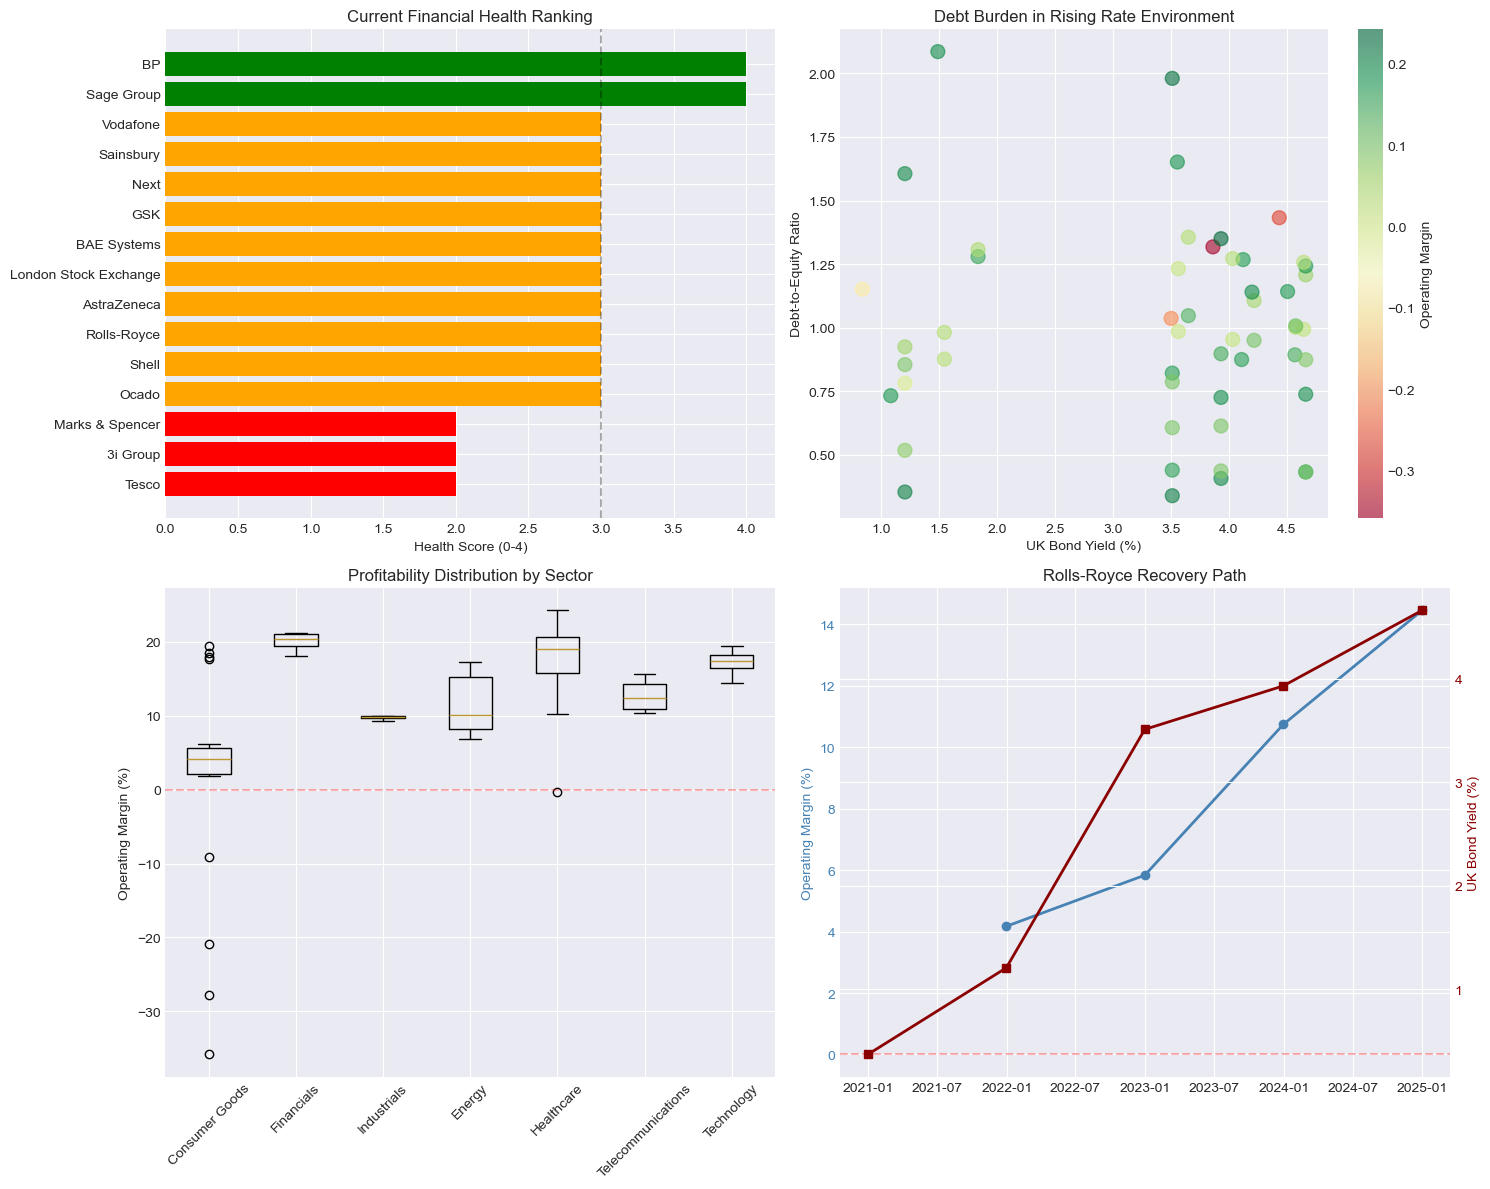


EDA Complete - see ../data/outputs/ for all visualizations


In [14]:
# Final EDA summary: Company risk dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Current health snapshot (latest data per company)
latest_data = df_merged.sort_values('date').groupby('company').tail(1)

health_score = (
    (latest_data['debt_to_equity'] < 1.5).astype(int) +
    (latest_data['operating_margin'] > 0.05).astype(int) +
    (latest_data['cash_to_assets'] > 0.1).astype(int) +
    (~latest_data['in_distress']).astype(int)
)

latest_data['health_score'] = health_score
latest_sorted = latest_data.sort_values('health_score')

colors = ['red' if x <= 2 else 'orange' if x == 3 else 'green' for x in latest_sorted['health_score']]
axes[0, 0].barh(latest_sorted['company'], latest_sorted['health_score'], color=colors)
axes[0, 0].set_xlabel('Health Score (0-4)')
axes[0, 0].set_title('Current Financial Health Ranking')
axes[0, 0].axvline(x=3, color='black', linestyle='--', alpha=0.3)

# 2. Debt burden vs interest rate environment
axes[0, 1].scatter(df_healthy_merged['uk_bond_yield'], 
                   df_healthy_merged['debt_to_equity'],
                   c=df_healthy_merged['operating_margin'], 
                   cmap='RdYlGn', s=100, alpha=0.6)
axes[0, 1].set_xlabel('UK Bond Yield (%)')
axes[0, 1].set_ylabel('Debt-to-Equity Ratio')
axes[0, 1].set_title('Debt Burden in Rising Rate Environment')
cbar = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
cbar.set_label('Operating Margin')

# 3. Sector performance distribution
sector_box_data = []
for sector in df_healthy_merged['sector'].unique():
    sector_data = df_healthy_merged[df_healthy_merged['sector'] == sector]['operating_margin'].dropna()
    if len(sector_data) > 0:
        sector_box_data.append(sector_data * 100)

axes[1, 0].boxplot(sector_box_data, labels=df_healthy_merged['sector'].unique())
axes[1, 0].set_ylabel('Operating Margin (%)')
axes[1, 0].set_title('Profitability Distribution by Sector')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.3)

# 4. Time to recovery: Rolls-Royce
rr_full = df_merged[df_merged['company'] == 'Rolls-Royce'].sort_values('date')
ax2 = axes[1, 1]
ax2.plot(rr_full['date'], rr_full['operating_margin'] * 100, 
         marker='o', linewidth=2, color='steelblue', label='Operating Margin')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.3)
ax2.set_ylabel('Operating Margin (%)', color='steelblue')
ax2.set_title('Rolls-Royce Recovery Path')
ax2.tick_params(axis='y', labelcolor='steelblue')

ax2_twin = ax2.twinx()
ax2_twin.plot(rr_full['date'], rr_full['uk_bond_yield'], 
              marker='s', linewidth=2, color='darkred', label='Bond Yield')
ax2_twin.set_ylabel('UK Bond Yield (%)', color='darkred')
ax2_twin.tick_params(axis='y', labelcolor='darkred')

plt.tight_layout()
plt.savefig('../data/outputs/eda_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nEDA Complete - see ../data/outputs/ for all visualizations")